In [21]:
%pip install tensorboard
%pip install stable-baselines3
%pip install gymnasium
%pip install shimmy
%pip install torch
%pip install stable-baselines3 gym
%pip install matplotlib
# Guardado por sea caso

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached gymnasium-1.0.0a2-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-1.0.0a2-py3-none-any.whl (954 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.1
    Uninstalling gymnasium-0.29.1:
      Successfully uninstalled gymnasium-0.29.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0a2 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0a2
    Uninstalling gymnasium-1.0.0a2:
      Successfully uninstalled gymnasium-1.0.0a2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shimmy 2.0.0 requires gymnasium>=1.0.0a1, but you have gymnasium 0.29.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from math import sqrt
import matplotlib.pyplot as plt

In [23]:
def generador_data(fac, dem, deman_max):
    ancho = 2500
    cor_dem = [(random.randint(1, ancho), random.randint(1, ancho)) for _ in range(dem)]
    dem_p = [np.random.poisson(deman_max) for _ in range(dem)]  # Tamaño de puntos escalado para visualización
    risk_d= [np.random.poisson(5) for _ in range(dem)]
    cor_fac = [(random.randint(1, ancho), random.randint(1, ancho)) for _ in range(fac)]

    coorde=[cor_dem,cor_fac]
    # Crear el grafo
    G = nx.Graph()

    # Añadir nodos de demanda y facilidad al grafo
    for i, coord in enumerate(cor_dem):
        G.add_node(f"D{i}", pos=coord, demand=dem_p[i], color='red', size=dem_p[i])

    for j, coord in enumerate(cor_fac):
        G.add_node(f"F{j}", pos=coord, color='blue', size=100)  # Tamaño fijo para facilidades

    # Conectar nodos si cumplen una condición específica (e.g., todos conectados)
    cover=[]
    for i, c_dem in enumerate(cor_dem):
        for j, c_fac in enumerate(cor_fac):
            # Conectar si la distancia es menor a un umbral, ajustar según necesidad
            if sqrt((c_dem[0] - c_fac[0]) ** 2 + (c_dem[1] - c_fac[1]) ** 2) < 800:
                cover.append(1)
                G.add_edge(f"D{i}", f"F{j}")
            else:
                cover.append(0)

    cover=np.array(cover).reshape(fac,dem)
    # Establecer el tamaño de la figura (ancho x alto en pulgadas)
    plt.figure(figsize=(15, 15))  # Ajuste del tamaño de la figura a 15x15 pulgadas
    pos = nx.get_node_attributes(G, 'pos')
    colors = [G.nodes[node]['color'] for node in G.nodes]
    sizes = [G.nodes[node]['size'] for node in G.nodes]

    nx.draw(G, pos, node_color=colors, node_size=sizes, with_labels=False, edge_color='gray', alpha=0.6)
    plt.title('Red de Puntos de Demanda y Facilidades')
    plt.show()
    return dem_p,cover,coorde,risk_d


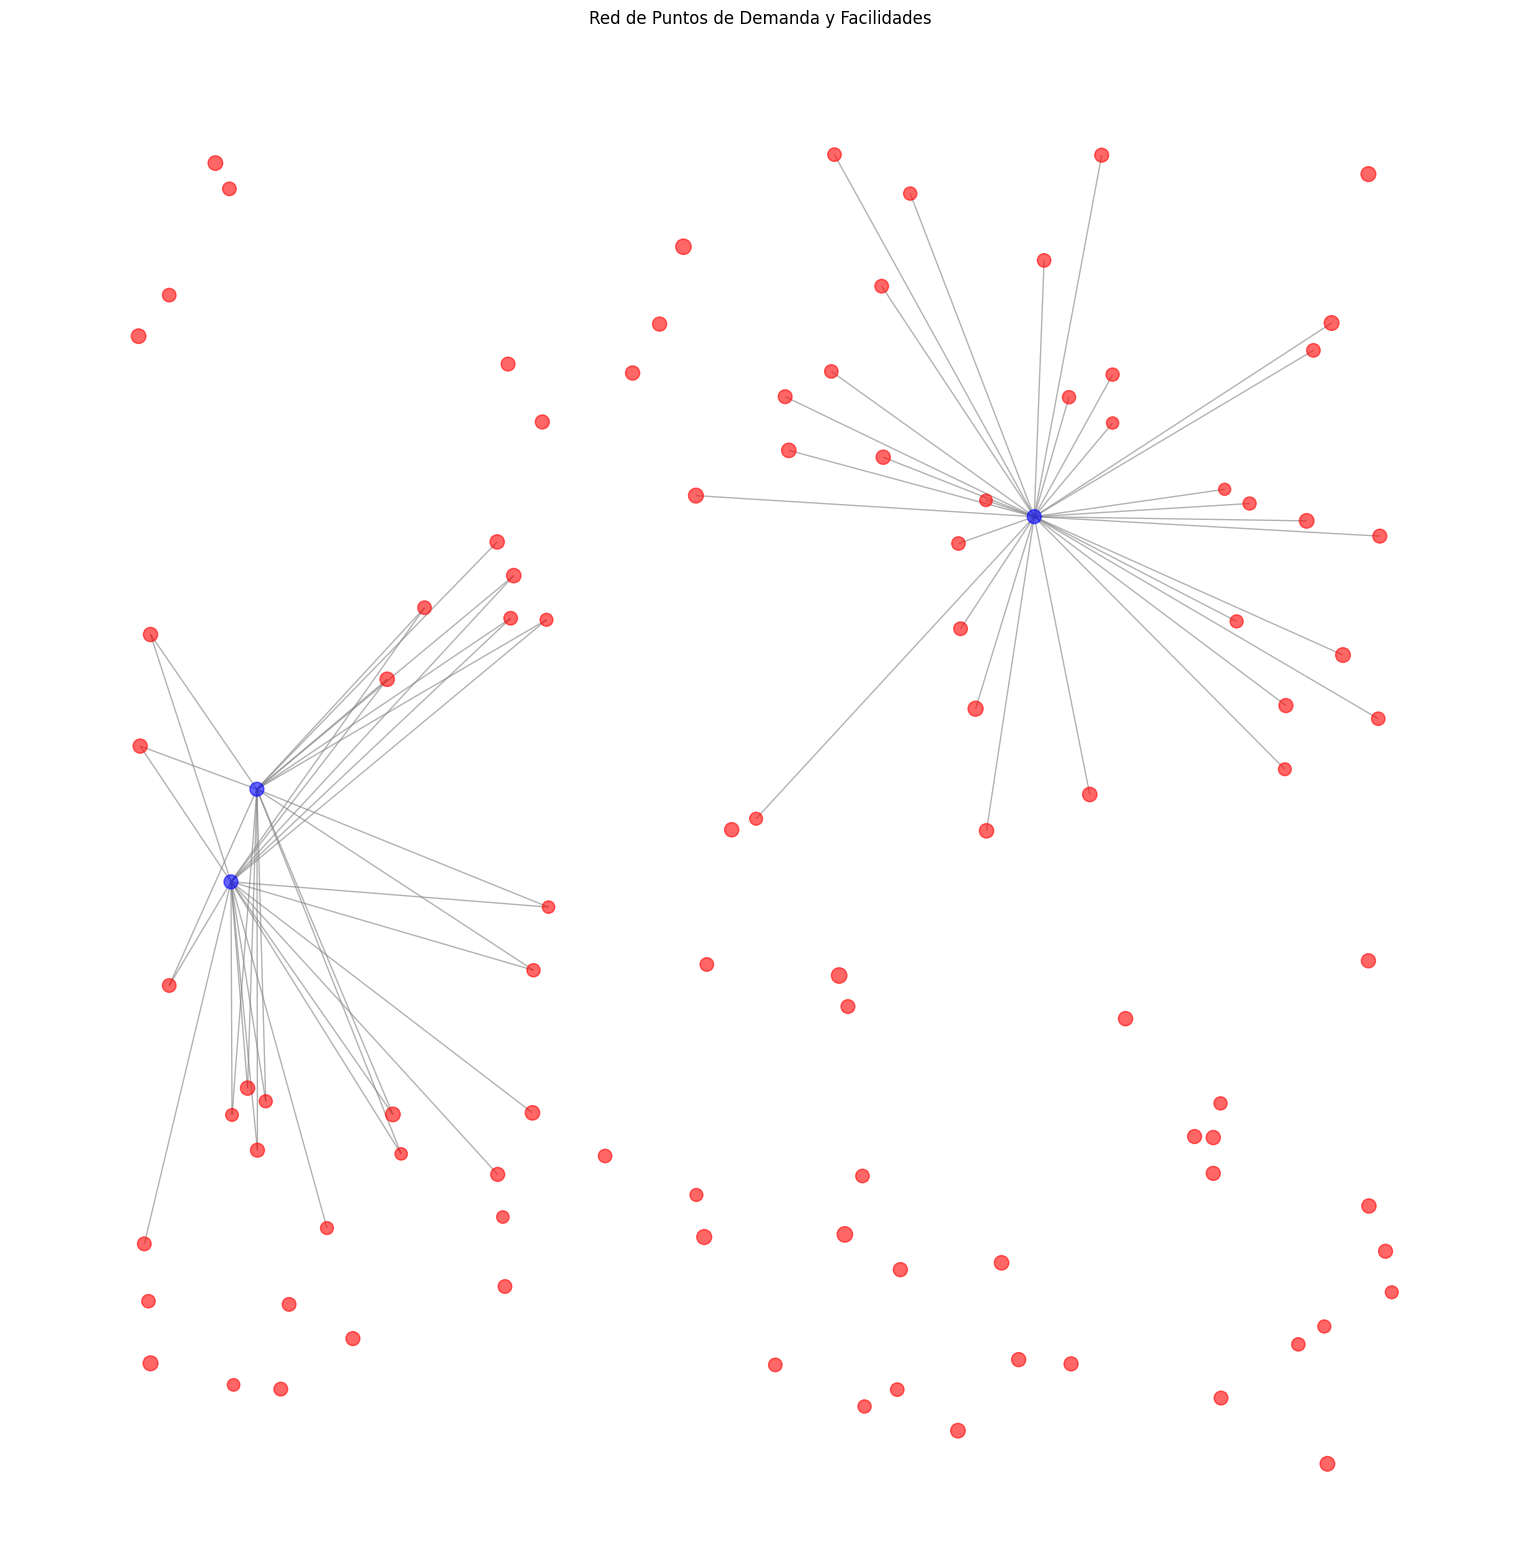

9867


In [69]:
fac=3
demp=100
deman_max=100
demanda,m_cover,coord_punto,risk_d=generador_data(fac, demp, deman_max)
print(sum(demanda))



In [70]:
n_filas, n_columnas = m_cover.shape

dic = {}
dem_fac = {}
cover = {}

# Iterar sobre las filas
for i in range(n_filas):
    acum = [0, []]
    dem_acum = 0
    lista = []
    # Iterar sobre las columnas
    for j in range(n_columnas):
        if m_cover[i][j] != 0:
            dem_acum += int(m_cover[i][j]) * demanda[j]
            acum[0] = dem_acum
            acum[1].append(demanda[j])
            lista.append(j)
    
    dic[i] = acum
    dem_fac[i] = dem_acum
    cover[i] = lista

cover_dic=cover
dem_fac
print(cover_dic)

{0: [16, 20, 21, 22, 29, 38, 41, 45, 46, 51, 60, 61, 71, 74, 76, 80, 86, 89, 93, 94], 1: [1, 3, 8, 9, 14, 15, 19, 20, 21, 28, 32, 33, 43, 46, 53, 54, 56, 57, 61, 64, 67, 68, 69, 74, 75, 79, 88, 91], 2: [3, 4, 5, 18, 24, 27, 33, 35, 48, 52, 53, 57, 61, 62, 69, 76, 77, 84, 93, 96]}


In [71]:
uncover=[]
for i in range(len(cover_dic)):
    uncover+=cover_dic[i]
comple_ara=np.arange(0,demp)
uncover=np.unique(uncover)
uncover=set(comple_ara)-set(uncover)
uncover=list(uncover)
uncover.sort()
demand_unco={i:demanda[i] for i in uncover}
print(demand_unco)
sum(demand_unco.values())

{0: 98, 2: 94, 6: 88, 7: 95, 10: 110, 11: 81, 12: 96, 13: 85, 17: 106, 23: 90, 25: 101, 26: 98, 30: 110, 31: 111, 34: 97, 36: 107, 37: 101, 39: 105, 40: 107, 42: 89, 44: 95, 47: 94, 49: 103, 50: 99, 55: 102, 58: 90, 59: 110, 63: 94, 65: 95, 66: 97, 70: 105, 72: 78, 73: 90, 78: 108, 81: 104, 82: 108, 83: 111, 85: 75, 87: 88, 90: 100, 92: 96, 95: 101, 97: 86, 98: 117, 99: 115}


4430


----------------------------------------------------------------------------------------------------
EPISODIO 0
----------------------------------------------------------------------------------------------------
día: 1
 - Instalación 0: 2 carpas, atendiendo puntos de demanda: [16, 20, 21, 22, 29, 38, 41, 45, 46, 51, 60, 61, 71, 74, 76, 80, 86, 89, 93, 94]
 - Instalación 2: 3 carpas, atendiendo puntos de demanda: [3, 4, 5, 18, 24, 27, 33, 35, 48, 52, 53, 57, 61, 62, 69, 76, 77, 84, 93, 96]
día: 2
 - Instalación 0: 4 carpas, atendiendo puntos de demanda: [16, 20, 21, 22, 29, 38, 41, 45, 46, 51, 60, 61, 71, 74, 76, 80, 86, 89, 93, 94]
 - Instalación 1: 6 carpas, atendiendo puntos de demanda: [1, 3, 8, 9, 14, 15, 19, 20, 21, 28, 32, 33, 43, 46, 53, 54, 56, 57, 61, 64, 67, 68, 69, 74, 75, 79, 88, 91]
 - Instalación 2: 6 carpas, atendiendo puntos de demanda: [3, 4, 5, 18, 24, 27, 33, 35, 48, 52, 53, 57, 61, 62, 69, 76, 77, 84, 93, 96]
día: 3
 - Instalación 0: 4 carpas, atendiendo puntos de

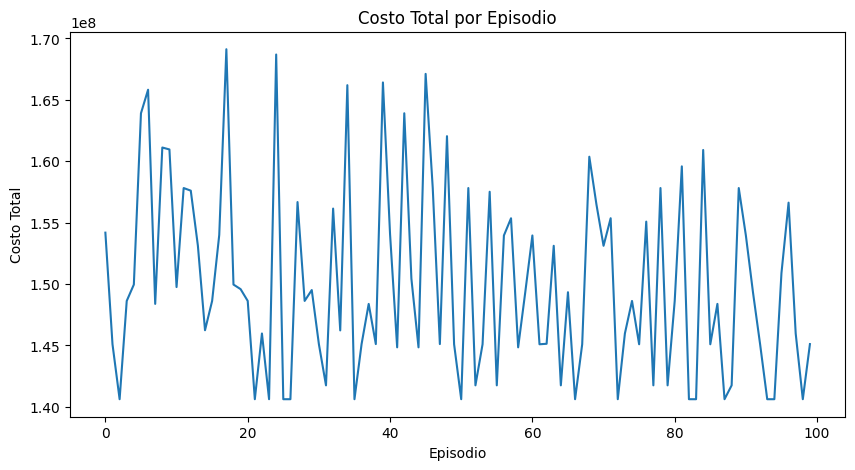

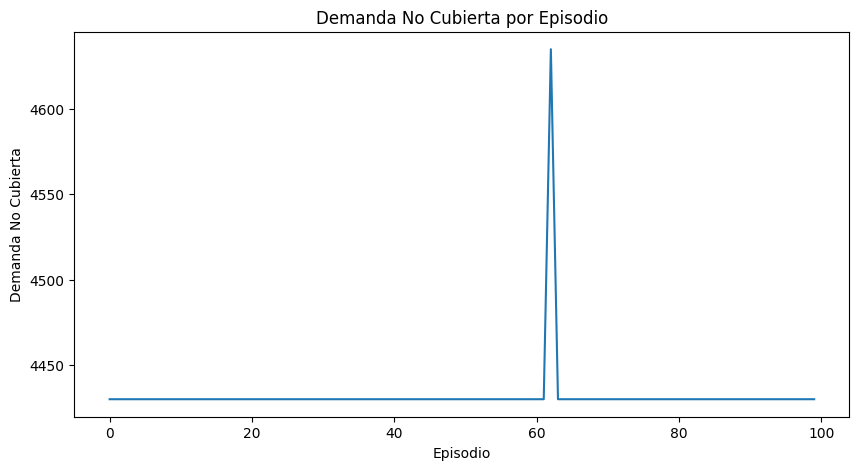

In [80]:
import gym
from gym import spaces
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim

class HumanitarianFacilityLocationEnv(gym.Env):
    """Entorno para modelar la ubicación de facilidades en situaciones humanitarias."""
    def __init__(self, num_demand_points, num_facilities, num_days, coverage_dict, people_per_demand_point, 
                 max_installations_per_facility=6, max_capacity_per_tent=50, max_available_tents=100,risk_per_point=None):
        super(HumanitarianFacilityLocationEnv, self).__init__()
        self.num_demand_points = num_demand_points
        self.num_facilities = num_facilities
        self.num_days = num_days
        self.current_day = 0
        self.coverage_dict = coverage_dict
        self.people_per_demand_point = np.array(people_per_demand_point, dtype=np.int32)
        self.demand_status = np.ones(self.num_demand_points, dtype=int) 
        self.max_installations_per_facility = max_installations_per_facility
        self.max_capacity_per_tent = max_capacity_per_tent
        self.max_available_tents = max_available_tents
        self.installations_per_facility = np.zeros(num_facilities, dtype=int)
        self.available_installations = self.max_available_tents
        self.action_space = spaces.MultiDiscrete([max_installations_per_facility + 1] * num_facilities)
        self.risk_per_demand_point = np.array(risk_per_point, dtype=np.int32)
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.num_demand_points,), dtype=np.uint8)

    def reset(self):
        self.current_day = 0
        self.installations_per_facility.fill(0)
        self.available_installations = self.max_available_tents  # Reiniciar disponibilidad
        self.demand_status.fill(1)
        self.state = self.update_coverage()
        return self.state

    def update_coverage(self):
        capacity_used_per_demand_point = np.zeros(self.num_demand_points)
        for facility_index in range(self.num_facilities):
            if facility_index in self.coverage_dict:
                covered_demand_points = self.coverage_dict[facility_index]
                capacity_used_per_demand_point[covered_demand_points] += self.installations_per_facility[facility_index] * self.max_capacity_per_tent
        self.state = np.where(capacity_used_per_demand_point >= self.people_per_demand_point, 0, 1)
        return self.state


    def step(self, action):
        # Asegurar que no se instalen más instalaciones de las disponibles **en el día actual**
        action = np.minimum(action, self.available_installations)
        # Asegurar que no se supere el límite por instalación
        action = np.minimum(action, self.max_installations_per_facility - self.installations_per_facility)

        self.installations_per_facility += action
        self.available_installations -= np.sum(action)

        reward = self.evaluate_reward()
        self.state = self.update_coverage()

        self.current_day += 1
        # El episodio termina si se llega al último día o si se cubre toda la demanda
        done = self.current_day >= self.num_days or np.all(self.state == 0)

        # Reiniciar la disponibilidad de instalaciones al principio de cada día
        if not done:
            self.available_installations = self.max_available_tents

        info = {}
        
        #print()
        # print(f"(DIA {self.current_day}):")
        # print("*"*100)
        # print(f"Estado actual: {self.state}")
        # print(f"Demanda: {self.people_per_demand_point}")
        # print(f"Demanda actual: {sum(self.people_per_demand_point*self.state)}")
        #print(f"Recompensa: {self.evaluate_reward()}")
        # Depurar la demanda por punto de demanda
        return self.state, reward, done, info

    def evaluate_reward(self):
        uncovered_people = np.sum(self.state * self.people_per_demand_point*self.risk_per_demand_point)*1000 
        #total_capacity = np.sum(self.installations_per_facility * self.max_capacity_per_facility)
        #capacity_reward = (total_capacity - uncovered_people) / total_capacity if total_capacity > 0 else 0 
        #unused_capacity_penalty = (total_capacity - uncovered_people) / total_capacity if total_capacity > 0 else 0 
        
        # Penalización por cobertura redundante:
        redundant_coverage_penalty = 0
        for demand_point in range(self.num_demand_points):
            covering_facilities = 0
            for facility_index in range(self.num_facilities):
                if facility_index in self.coverage_dict and demand_point in self.coverage_dict[facility_index]:
                    covering_facilities += 1
            if covering_facilities > 1:  # Si más de una instalación cubre el punto
                redundant_coverage_penalty += (covering_facilities - 1) * 100  # Penalizar por cada instalación extra
       
        num_tents_penalty = np.sum(self.installations_per_facility) * 100
        return -uncovered_people - num_tents_penalty-redundant_coverage_penalty

class DQNNetwork(nn.Module):
    def __init__(self, state_dim, num_facilities, max_installations_per_facility):
        super(DQNNetwork, self).__init__()
        self.layer1 = nn.Linear(state_dim, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, num_facilities * (max_installations_per_facility + 1))
        self.num_facilities = num_facilities
        self.max_installations_per_facility = max_installations_per_facility

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        x = x.view(-1, self.num_facilities, self.max_installations_per_facility + 1)
        return x


class DQNAgent:
    def __init__(self, state_dim, num_facilities, max_installations_per_facility, coverage_dict, epsilon=0.1):
        self.model = DQNNetwork(state_dim, num_facilities, max_installations_per_facility)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()
        self.epsilon = epsilon
        self.num_facilities = num_facilities
        self.max_installations_per_facility = max_installations_per_facility
        self.coverage_dict = coverage_dict

    def choose_action(self, state):
        if random.random() < self.epsilon:
            action = np.random.randint(0, self.max_installations_per_facility + 1, size=self.num_facilities)
            return action
        else:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                q_values = self.model(state_tensor)
                # Implementación para seleccionar la mejor acción:
                action = []
                for facility_index in range(self.num_facilities):
                    if facility_index in self.coverage_dict and self.coverage_dict[facility_index]:
                        # Encuentra la acción (cantidad de carpas) que maximiza el valor Q para la facilidad actual
                        best_action = torch.argmax(q_values[0, facility_index]).item()
                        action.append(best_action)
                    else:
                        # Si la facilidad no está en coverage_dict, no se instalan carpas
                        action.append(0)

                return np.array(action) 

    def update_model(self, state, action, reward, next_state, done):
        state = torch.FloatTensor(state).unsqueeze(0)
        next_state = torch.FloatTensor(next_state).unsqueeze(0)

        reward = torch.FloatTensor([reward])
        done = torch.FloatTensor([int(done)])

        # Obtener los valores Q para todas las acciones en el estado actual
        q_values = self.model(state)

        # Convertir action a un tensor de PyTorch
        action_tensor = torch.LongTensor(action)

        # Convertir np.arange a un tensor de PyTorch
        facility_indices = torch.arange(self.num_facilities).long()

        # Seleccionar los valores Q de las acciones tomadas
        current_q = q_values[0, facility_indices, action_tensor]  

        # Obtener el Q máximo del siguiente estado para cada facilidad
        max_next_q = self.model(next_state).max(2)[0].detach()

        # Calcular el Q objetivo para cada facilidad
        expected_q = (reward + 0.99 * max_next_q * (1 - done)).unsqueeze(1)

        # Calcular la pérdida
        loss = self.criterion(current_q, expected_q) 

        # Actualizar los pesos del modelo
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Main execution
# Define las variables de entrada

num_demand_points = demp
num_facilities = fac
num_days = 5
coverage_dict = cover_dic
people_per_demand_point = demanda

env = HumanitarianFacilityLocationEnv(num_demand_points=num_demand_points,
                                      num_facilities=num_facilities,
                                      num_days=num_days,
                                      coverage_dict=coverage_dict,
                                      people_per_demand_point=people_per_demand_point,
                                      risk_per_point=risk_d)

state_dim = env.observation_space.shape[0]
max_installations_per_facility = env.max_installations_per_facility
agent = DQNAgent(state_dim=state_dim, 
                 num_facilities=num_facilities, 
                 max_installations_per_facility=max_installations_per_facility,
                 coverage_dict=coverage_dict)  # Pasar coverage_dict al agente

num_episodes = 100
demand_history_by_day = [] 
episode_costs = [] # Lista para almacenar el costo por episodio
uncovered_demand_per_episode = [] # Lista para almacenar 
best_solution = None
best_reward = float('-inf')


for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    demand_history_by_day.append([]) 
    print()
    print("-"*100)
    print("EPISODIO",episode)
    print("-"*100)
    
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update_model(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        # Imprimir información de asignación de instalaciones a puntos de demanda
        #print("Instalaciones por facilidad:", env.installations_per_facility)
        print(f"día: {env.current_day}" )
        for facility_index, num_installations in enumerate(env.installations_per_facility):
            if num_installations > 0:
                covered_demand_points = env.coverage_dict.get(facility_index, [])
                
                print(f" - Instalación {facility_index}: {num_installations} carpas, atendiendo puntos de demanda: {covered_demand_points}")
        # Actualizar la demanda faltante al final de cada día
        if env.current_day > 0 and env.current_day % 1 == 0:
            uncovered_people = np.sum(env.state * env.people_per_demand_point) 
            demand_history_by_day[-1].append(uncovered_people)

    print(f"Episode {episode + 1}: Total Reward = {total_reward}, Uncovered People = {uncovered_people}")
    episode_costs.append(-total_reward)
    uncovered_demand_per_episode.append(uncovered_people)
    if total_reward > best_reward:
        best_reward = total_reward
        best_solution = env.installations_per_facility.copy()
        # Guardar el modelo
        torch.save(agent.model.state_dict(), 'mejor_modelo_DQN.pth')
best_installations_per_facility = best_solution.copy()
print("Mejor solución encontrada:")
for facility_index, num_installations in enumerate(best_installations_per_facility):
    if num_installations > 0:
        covered_demand_points = env.coverage_dict.get(facility_index, [])
        print(f" - Instalación {facility_index}: {num_installations} carpas, atendiendo puntos de demanda: {covered_demand_points}") 
        sumaa=0
        for co in covered_demand_points: 
            sumaa=sumaa+demanda[co]
        print("-"*3,num_installations*100,sumaa)


# Graficar el costo total por episodio
plt.figure(figsize=(10, 5))
plt.plot(episode_costs)
plt.xlabel('Episodio')
plt.ylabel('Costo Total')
plt.title('Costo Total por Episodio')
plt.show()

# Graficar la demanda no cubierta por episodio
plt.figure(figsize=(10, 5))
plt.plot(uncovered_demand_per_episode)
plt.xlabel('Episodio')
plt.ylabel('Demanda No Cubierta')
plt.title('Demanda No Cubierta por Episodio')
plt.show()

In [58]:
print(sum(demanda))
print(demp)

10104
100


In [59]:
cord_dem=coord_punto[0]
pos1={}
print(cord_dem)
i=0
for co in cord_dem:
    pos1[f"D{i}"] = co
    i+=1
print(pos1)

[(793, 762), (1039, 380), (1213, 1737), (1267, 853), (254, 277), (831, 2260), (509, 2318), (399, 2128), (1986, 507), (1675, 226), (297, 1073), (2182, 774), (2364, 2129), (2016, 64), (1834, 1879), (27, 1532), (1180, 510), (2095, 1481), (2199, 1619), (1184, 2274), (1516, 2092), (750, 2140), (725, 2148), (1293, 765), (2224, 62), (2430, 1553), (2123, 1405), (1939, 1356), (2116, 1735), (606, 1579), (505, 689), (1681, 1704), (1867, 1996), (1038, 374), (2167, 1874), (17, 208), (1186, 1537), (2315, 1526), (1933, 838), (1287, 2351), (1665, 207), (56, 13), (145, 1713), (2373, 2363), (2003, 2020), (788, 1680), (1241, 1606), (2408, 2027), (531, 1661), (1493, 2329), (1151, 387), (1264, 1380), (802, 888), (1523, 391), (2125, 900), (1492, 2404), (45, 1722), (1859, 486), (2000, 2325), (1537, 1327), (15, 123), (1604, 431), (1549, 624), (750, 381), (1170, 66), (2160, 2443), (2417, 2236), (720, 575), (1106, 1857), (709, 1159), (2316, 1667), (2428, 905), (224, 1077), (1090, 1470), (1501, 39), (293, 374), 

Día 1: [0 0 4 1 1]
actions [0 0 4 1 1]
Fac: 2
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 94, 96, 98]}
Fac: 3
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 

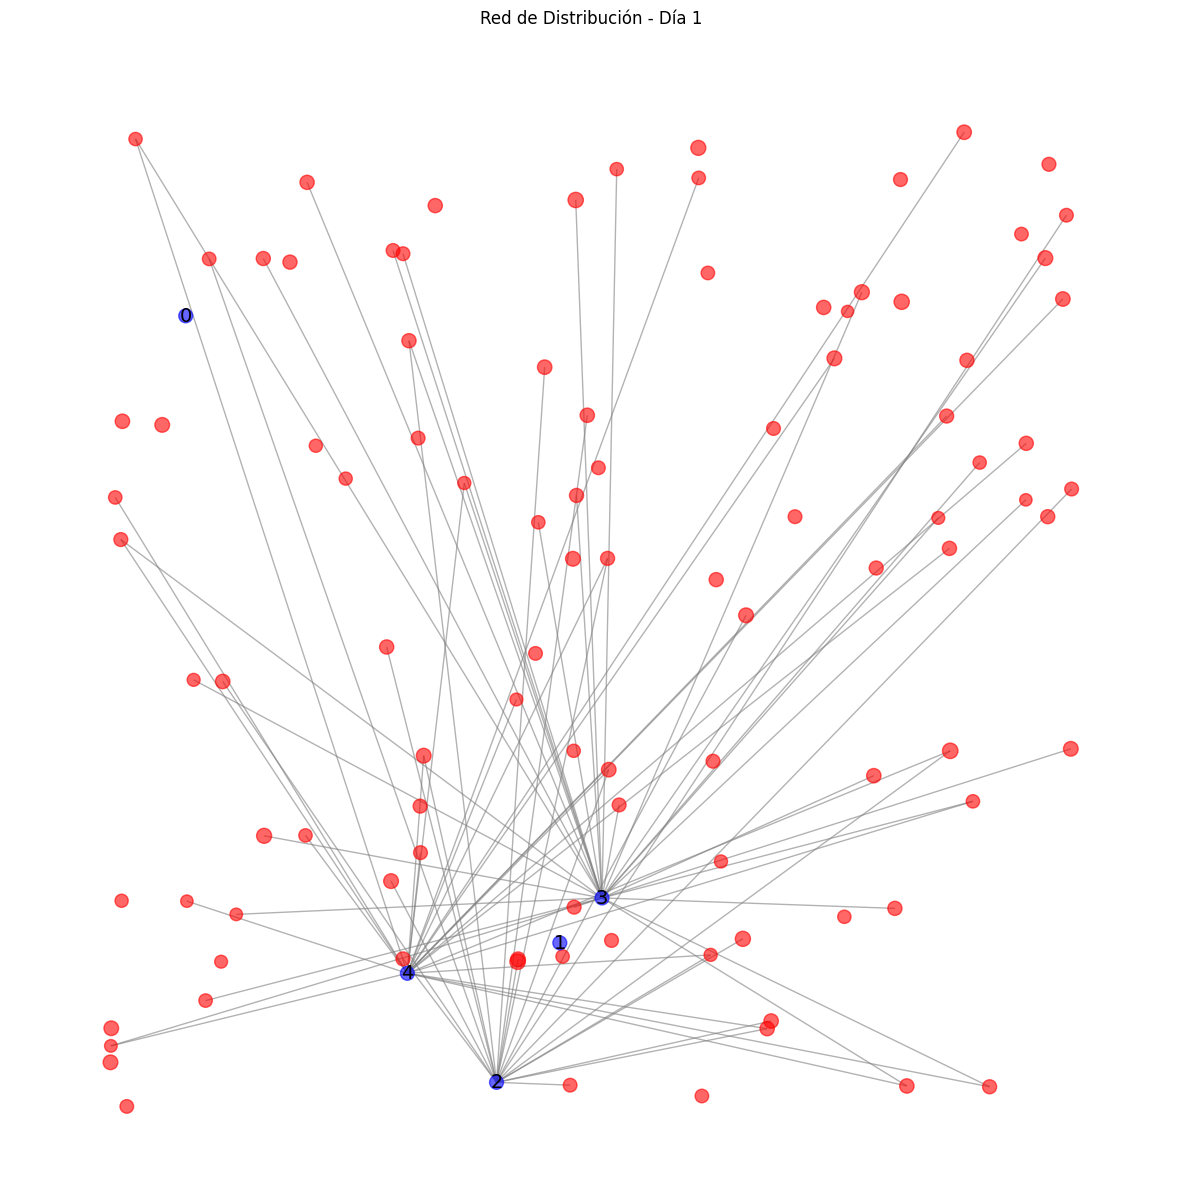

Día 2: [0 3 4 1 1]
actions [0 3 4 1 1]
Fac: 1
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 94, 96, 98]}
Fac: 2
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 

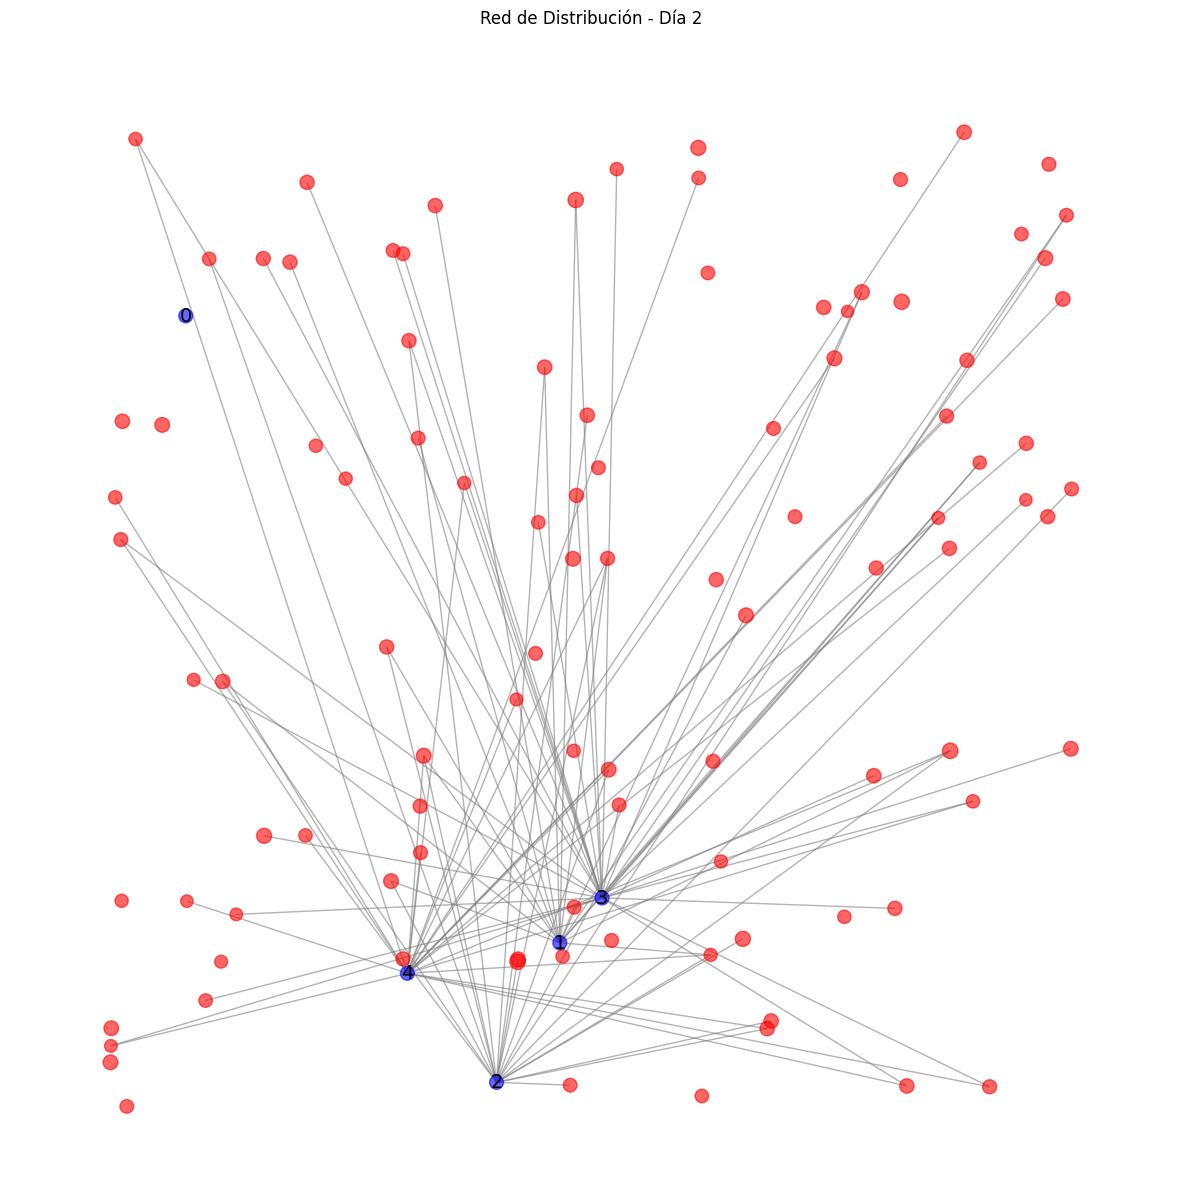

Día 3: [0 3 4 1 1]
actions [0 3 4 1 1]
Fac: 1
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 94, 96, 98]}
Fac: 2
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 

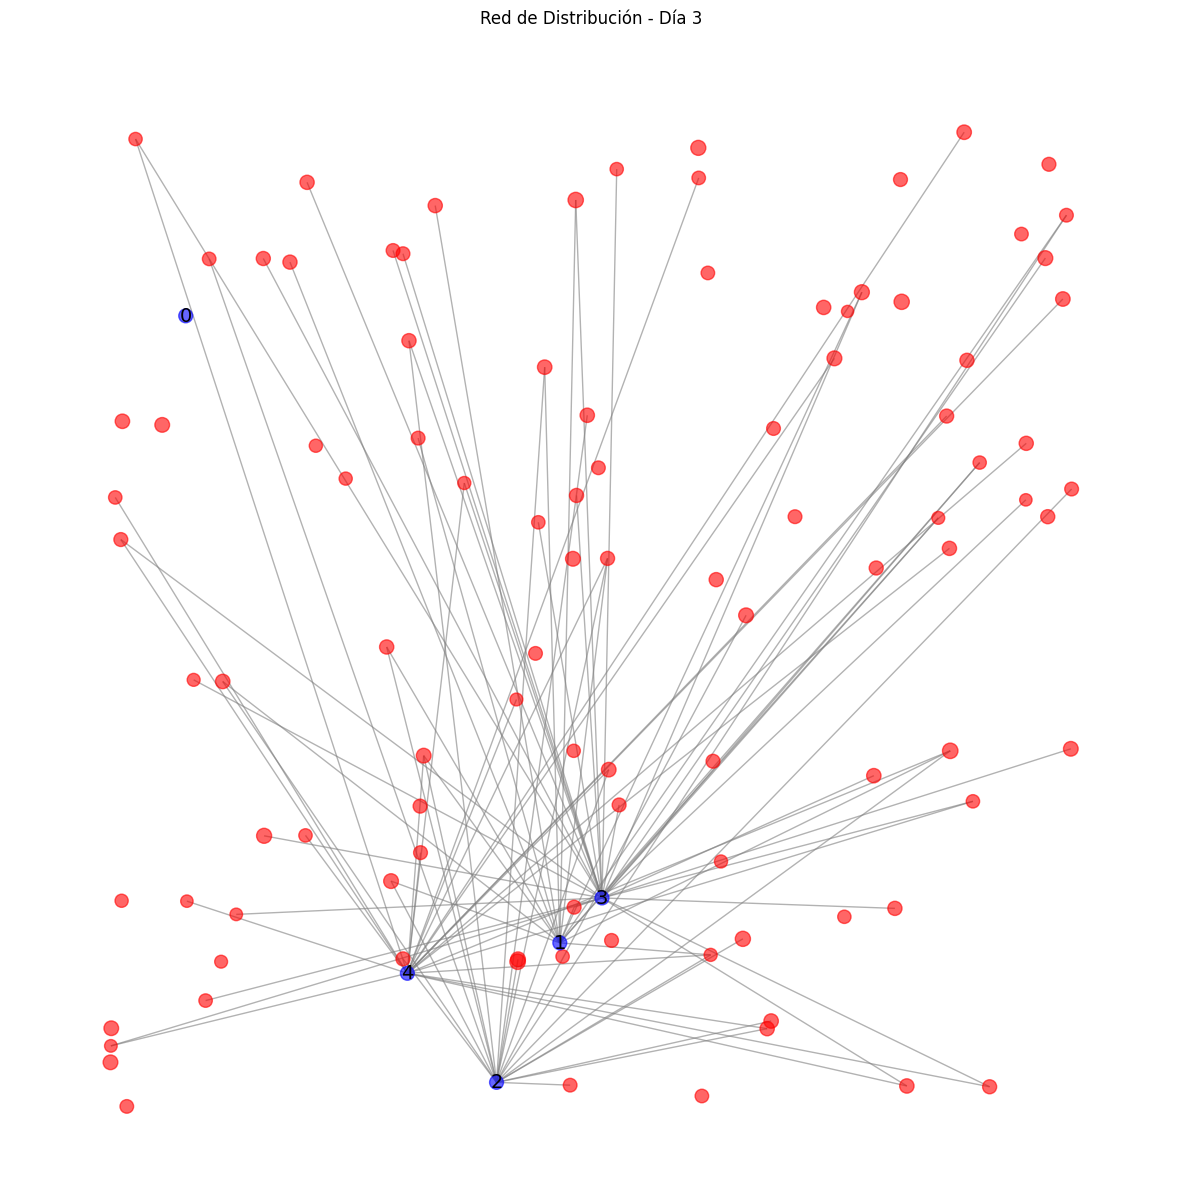

Día 4: [0 3 4 1 1]
actions [0 3 4 1 1]
Fac: 1
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 94, 96, 98]}
Fac: 2
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 

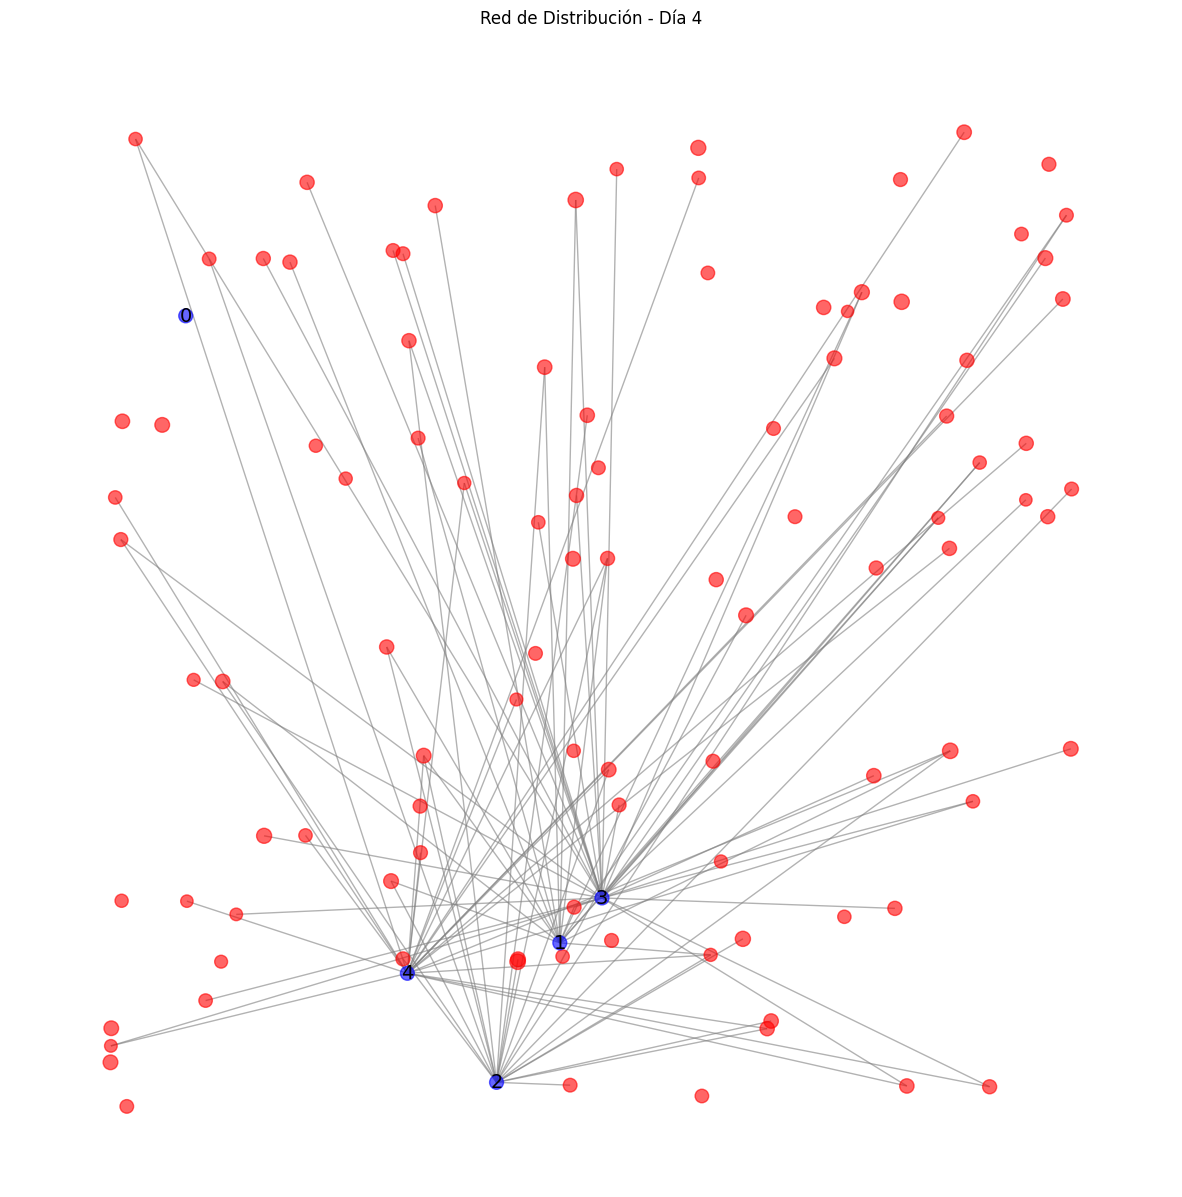

Día 5: [0 3 4 1 1]
actions [0 3 4 1 1]
Fac: 1
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 94, 96, 98]}
Fac: 2
{0: [1, 2, 3, 4, 6, 7, 8, 9, 16, 18, 19, 22, 24, 25, 30, 35, 43, 46, 47, 48, 75, 81, 82, 83, 84], 1: [5, 10, 16, 17, 18, 19, 45, 51, 52, 53, 54, 66, 67, 68, 69, 79, 93], 2: [1, 2, 3, 9, 10, 25, 40, 51, 52, 53, 54, 61, 63, 64, 66, 67, 68, 69, 80, 86, 88], 3: [4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 36, 37, 38, 39, 71, 72, 73, 77, 79, 81, 83, 84, 86, 89, 94], 4: [3, 11, 13, 14, 15, 24, 26, 28, 30, 40, 47, 49, 51, 52, 53, 54, 65, 70, 81, 82, 83, 84, 

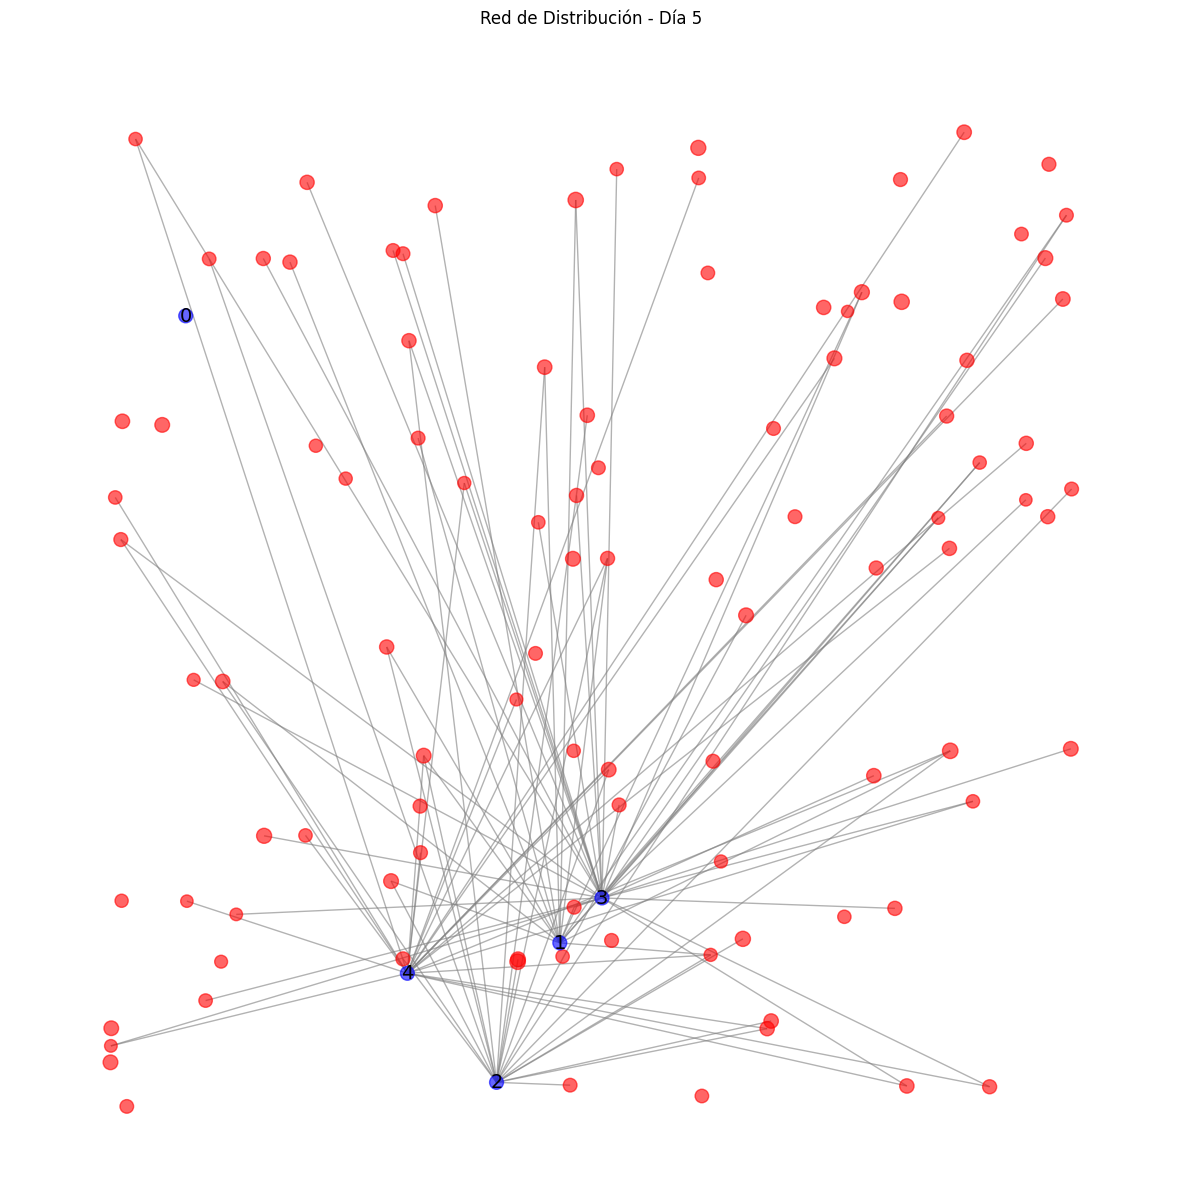

In [67]:
agent.model.load_state_dict(torch.load('mejor_modelo_DQN.pth'))

# Ejecutar un episodio y almacenar las acciones
state = env.reset()
done = False
actions_per_day = []

while not done:
    action = agent.choose_action(state)
    next_state, reward, done, info = env.step(action)
    state = next_state
    actions_per_day.append(action.copy())

# ----- Visualización del grafo por día -----
G = nx.Graph()

# Añadir nodos al grafo (ya no necesitamos añadir 'pos' aquí)
for i in range(demp):
    G.add_node(f"D{i}",pos=coord_punto[0][i], demand=demanda[i], color='red', size=demanda[i])
for j in range(fac):
    G.add_node(f"F{j}",pos=coord_punto[1][j], color='blue', size=100)

# Crear un diccionario de posiciones usando las coordenadas de 'coord'
# pos = {}


# for i, (x, y) in enumerate(coord_punto[0]):
#     pos[f"D{i}"] = (x, y)
# for j, (x, y) in enumerate(coord_punto[1]):
#     pos[f"F{j}"] = (x, y)

for day, actions in enumerate(actions_per_day):
    print(f"Día {day + 1}: {actions}")  

    plt.figure(figsize=(15, 15))
    plt.title(f'Red de Distribución - Día {day + 1}')

    # Dibujar aristas según las acciones del día
    print("actions",actions)
    for facility, num_installations in enumerate(actions):
        if num_installations > 0:
            print(f"Fac: {facility}")
            covered_demand_points = env.coverage_dict.get(facility, [])
            print(coverage_dict)
            for demand_point in covered_demand_points:
                G.add_edge(f"F{facility}", f"D{demand_point}", weight=num_installations)

    colors = [G.nodes[node]['color'] for node in G.nodes]
    sizes = [G.nodes[node]['size'] for node in G.nodes]
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_color=colors, node_size=sizes, with_labels=False, edge_color='gray', alpha=0.6)
    
    labels = {}
    for node in G.nodes():
        if node.startswith('F'):
            labels[node] = node[1:]  # Extrae el número después de 'F'

    nx.draw_networkx_labels(G, pos, labels=labels, font_size=14, font_color='black')

    # Mostrar el peso (instalaciones) en las aristas
    # edge_labels = nx.get_edge_attributes(G, 'weight')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    # nx.draw_networkx_edge_labels(G, pos, font_size=8)

    plt.show()
    G.remove_edges_from(list(G.edges()))